$\textbf{DS150 - TIME SERIES ANALYSIS} \\ \texttt{3Q SY2324}$ 
# <CENTER> Simulating Time Series Data Using Python

<CENTER> <i> Acenas, Shaun Marvin &nbsp &nbsp |&nbsp &nbsp  Carreon, Ma. Addine Anne

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
df = pd.read_csv('widget_sales.csv')

## Simple Moving Average MA(1) Model

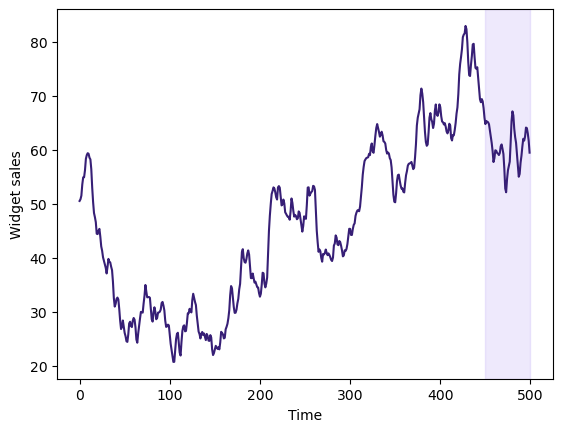

In [4]:
fig, ax = plt.subplots()

ax.plot(df['widget_sales'], color='#371f76')
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales')
ax.axvspan(450, 500, alpha=0.2, color='#ac94f4') # Horizon to predict

plt.show()

In [5]:
# Split data into training and testing set

train = df[:int(0.9*len(df))]
test = df[int(0.9*len(df['widget_sales'])):]

In [6]:
# Function to get average of last two points of a set

def MA1(df, horizon):
    pred_mean = []

    for _ in range(horizon):
        mean = df.tail(2).mean()
        pred_mean.append(mean)

    return pred_mean


In [7]:
HORIZON = len(test)
pred_df = test.copy()
pred_df['MA(1)'] = MA1(train['widget_sales'],HORIZON) # Get average of last two points of the training set
pred_df.head()

,widget_sales,MA(1)
450,64.736005,66.807965
451,65.316972,66.807965
452,65.172070,66.807965
453,65.075506,66.807965
454,64.703173,66.807965


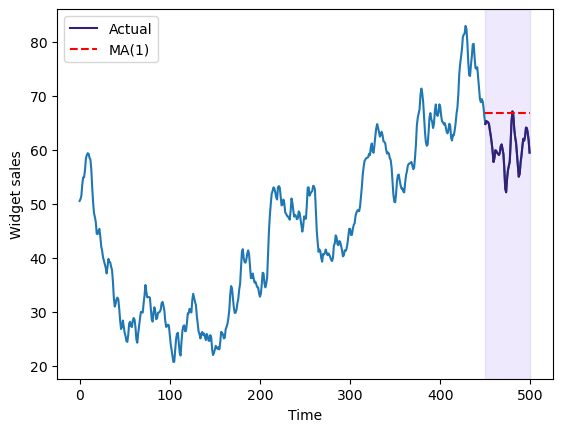

In [8]:
fig, ax = plt.subplots()

ax.plot(df)
ax.plot(pred_df['widget_sales'], color='#371f76', label='Actual')
ax.plot(pred_df['MA(1)'], '--', color='#ff0000', label='MA(1)')
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales')
ax.axvspan(450, 500, alpha=0.2, color='#ac94f4')

ax.legend()

plt.show()

## Moving Average Model (1st Differencing)

In [9]:
# 1st Differencing

widget_sales_diff = np.diff(df['widget_sales'], n=1)

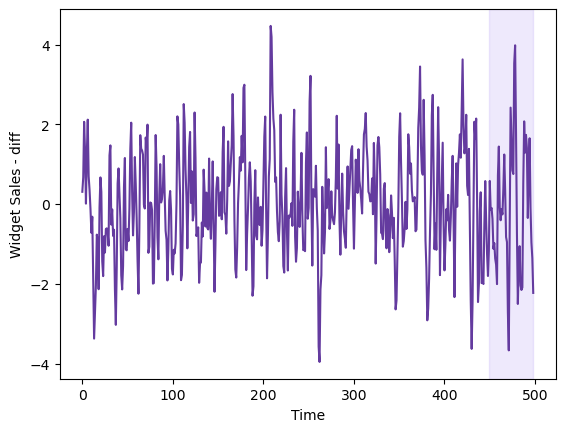

In [10]:
fig, ax = plt.subplots()

ax.plot(widget_sales_diff, color='#643b9f')
ax.set_xlabel('Time')
ax.set_ylabel('Widget Sales - diff')
ax.axvspan(449, 498, color='#ac94f4', alpha=0.2)


plt.show()

In [11]:
# Split differenced data into training and testing set

df_diff = pd.DataFrame({'widget_sales_diff': widget_sales_diff})

train_diff = df_diff[:int(0.9*len(df_diff))]
test_diff = df_diff[int(0.9*len(df_diff)):]

In [12]:
HORIZON_DIFF = len(test_diff)
pred_df['1st Difference MA(1)'] = MA1(train_diff['widget_sales_diff'],HORIZON_DIFF) # Get average of last two points of differenced training set
pred_df.head()



,widget_sales,MA(1),1st Difference MA(1)
450,64.736005,66.807965,-1.526718
451,65.316972,66.807965,-1.526718
452,65.172070,66.807965,-1.526718
453,65.075506,66.807965,-1.526718
454,64.703173,66.807965,-1.526718


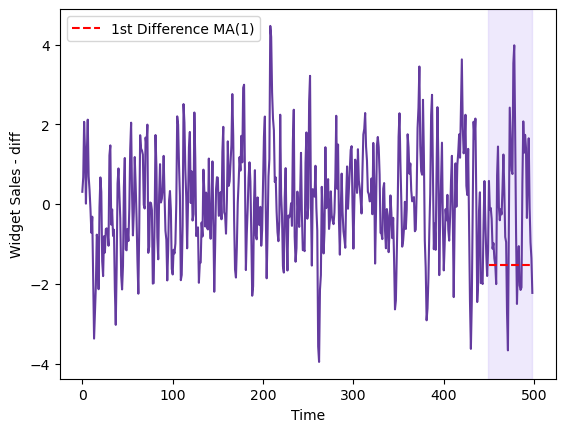

In [13]:
fig, ax = plt.subplots()

ax.plot(widget_sales_diff, color='#643b9f')
ax.plot(pred_df['1st Difference MA(1)'], color='#ff0000', linestyle='--', label='1st Difference MA(1)')
ax.set_xlabel('Time')
ax.set_ylabel('Widget Sales - diff')
ax.axvspan(449, 498, color='#ac94f4', alpha=0.2)

ax.legend()

plt.show()

## Moving Average Model (Lags and ACF plot)

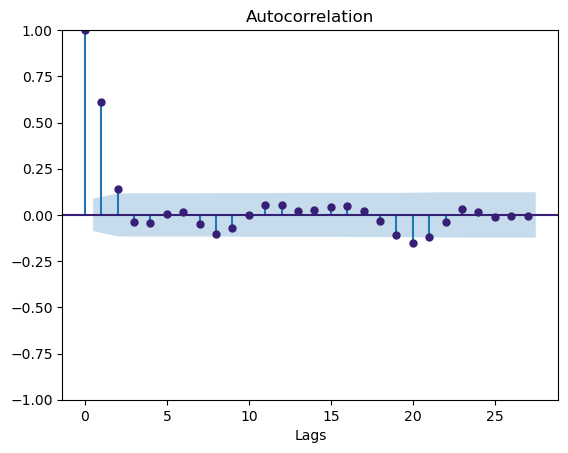

In [14]:
plot_acf(widget_sales_diff, color='#371f76')
plt.xlabel('Lags')
plt.show()

In [15]:
# Function to get rolling average of last 20 data points

def MA20(df, column, horizon):
    copy = df[column].values

    for _ in range(horizon):
        mean = copy[-20:].mean()
        copy = np.append(copy, mean)


    return copy

In [16]:
df_MA20 = pd.DataFrame(MA20(train, 'widget_sales', HORIZON), columns=['widget_sales'])
predicted = df_MA20.tail(len(test))

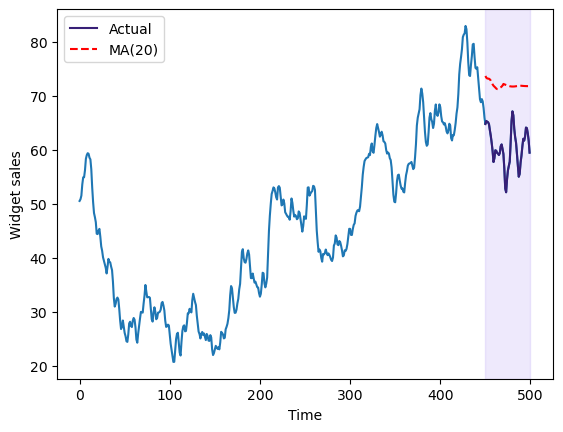

In [17]:
fig, ax = plt.subplots()

ax.plot(df)
ax.plot(pred_df['widget_sales'], label='Actual', color='#371f76')
ax.plot(predicted, '--', label='MA(20)', color='#ff0000')
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales')
ax.axvspan(450, 500, alpha=0.2, color='#ac94f4')

ax.legend()

plt.show()